# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style='whitegrid')
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

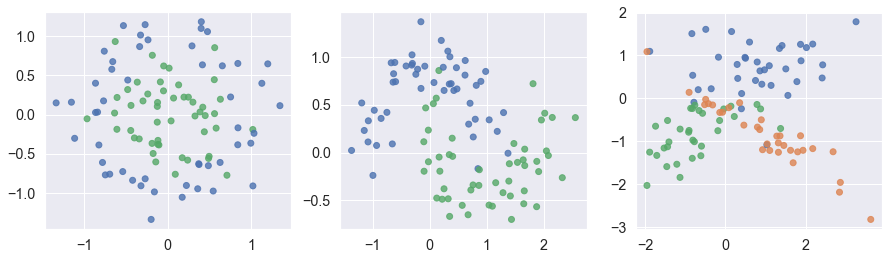

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    try:
        # Для красоты и чтобы потом было проще
        y_pred = clf.predict(X)
        accuracy = round(accuracy_score(y, y_pred), 2)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend(['Accuracy - {}'.format(accuracy)], loc='best')
    except ValueError:
        pass

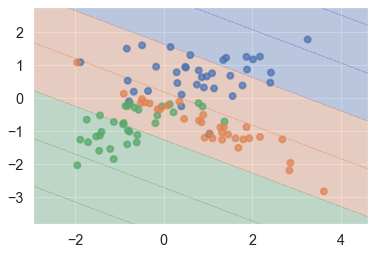

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

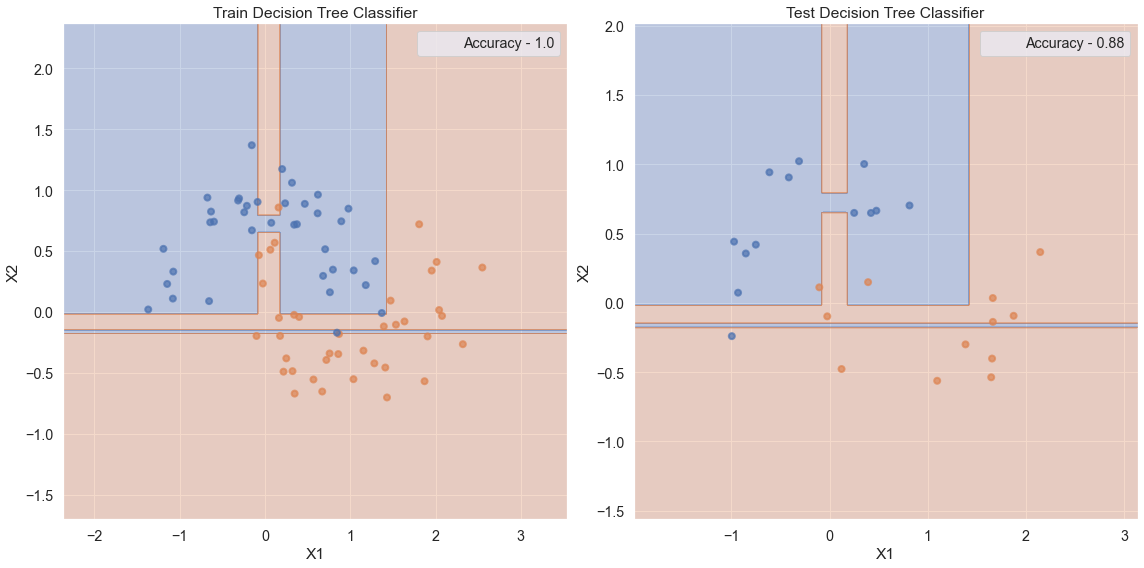

In [7]:
# make_moons
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(
    datasets[1][0], datasets[1][1], test_size=0.25, random_state=100, stratify=datasets[1][1])

tree = DecisionTreeClassifier()

tree.fit(X_train_moon, y_train_moon)
moon_train_pred = tree.predict(X_train_moon)
moon_test_pred = tree.predict(X_test_moon)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plot_surface(tree, X_train_moon, y_train_moon)
plt.title('Train Decision Tree Classifier')

plt.subplot(122)
plot_surface(tree, X_test_moon, y_test_moon)
plt.title('Test Decision Tree Classifier')

plt.tight_layout()
plt.show()

In [8]:
# Посчитаем точность 
acc_score_train_moon = accuracy_score(y_train_moon, moon_train_pred)
acc_score_test_moon = accuracy_score(y_test_moon, moon_test_pred)
print('''Accuracy score:
train - {}
test - {}'''.format(acc_score_train_moon, acc_score_test_moon))

Accuracy score:
train - 1.0
test - 0.88


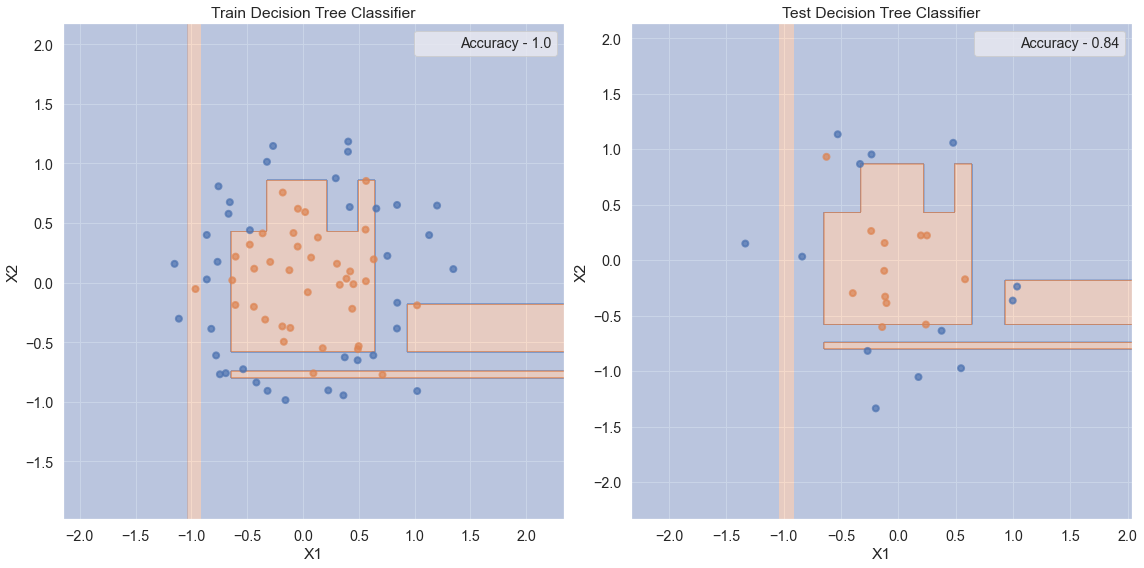

In [9]:
# make_circles
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    datasets[0][0], datasets[0][1], test_size=0.25, random_state=100, stratify=datasets[0][1])

tree.fit(X_train_circles, y_train_circles)
circles_train_pred = tree.predict(X_train_circles)
circles_test_pred = tree.predict(X_test_circles)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plot_surface(tree, X_train_circles, y_train_circles)

plt.title('Train Decision Tree Classifier')

plt.subplot(122)
plot_surface(tree, X_test_circles, y_test_circles)
plt.title('Test Decision Tree Classifier')

plt.tight_layout()
plt.show()

In [10]:
# Посчитаем точность 
acc_score_train_circles = accuracy_score(y_train_circles, circles_train_pred)
acc_score_test_circles = accuracy_score(y_test_circles, circles_test_pred)
print('''Accuracy score:
train - {}
test - {}'''.format(acc_score_train_circles, acc_score_test_circles))

Accuracy score:
train - 1.0
test - 0.84


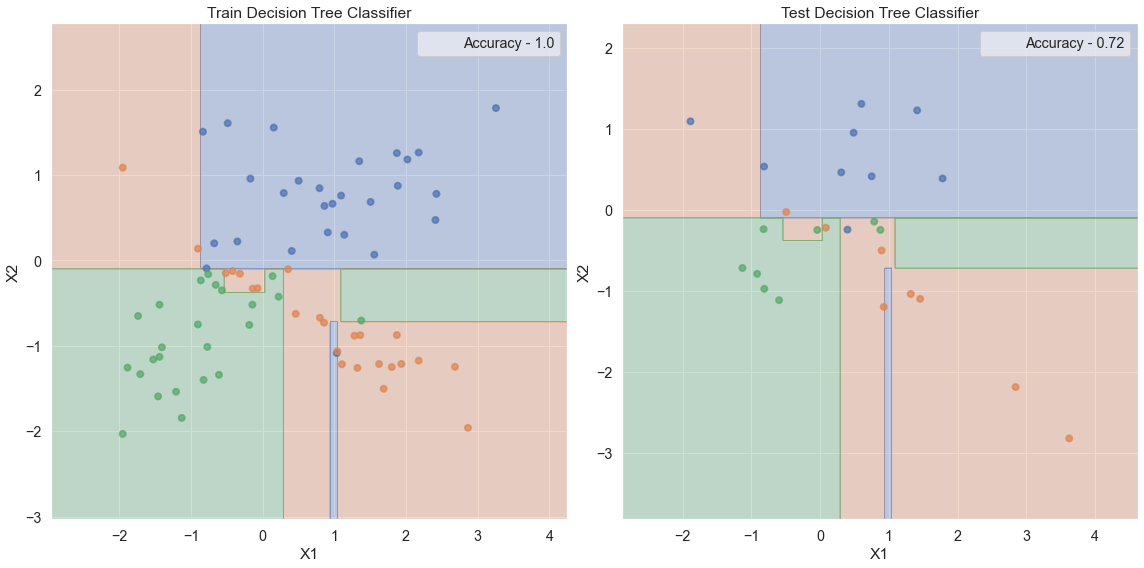

In [11]:
# classification
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    datasets[2][0], datasets[2][1], test_size=0.25, random_state=100, stratify=datasets[2][1])

tree.fit(X_train_clas, y_train_clas)
clas_train_pred = tree.predict(X_train_clas)
clas_test_pred = tree.predict(X_test_clas)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plot_surface(tree, X_train_clas, y_train_clas)
plt.title('Train Decision Tree Classifier')

plt.subplot(122)
plot_surface(tree, X_test_clas, y_test_clas)
plt.title('Test Decision Tree Classifier')

plt.tight_layout()
plt.show()

In [12]:
# Посчитаем точность 
acc_score_train_clas = accuracy_score(y_train_clas, clas_train_pred)
acc_score_test_clas = accuracy_score(y_test_clas, clas_test_pred)
print('''Accuracy score:
train - {}
test - {}'''.format(acc_score_train_clas, acc_score_test_clas))

Accuracy score:
train - 1.0
test - 0.72


__Ответ:__ Accuracy упала на 10-30% процентов. При учете, что данных у нас мало, то это очень существенная потеря. По графикам видно, что деревья со стандартными параметрами переобучились, это заметно по очень странным разделяющим поверхностям. Деревья без критериев остановы могут на тесте классифицировать объекты с долей правильных ответов в 100% (если не существует объектов с одинаковыми признаками, но с разными классами). Мы убедились, что стандартные деревья очень склоны к переобучению.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Для перебора параметров введем новые функции, существующая функция строит множество графиков одновременно с небольшим искажением, границы графика подбираются отдельно для обучающей и тестовой выборки, исправим это.

In [13]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

def plot_new_surface(clf, X_train, y_train, X_test, y_test):
    palette = sns.color_palette(n_colors=len(np.unique(y_train)))
    cmap = ListedColormap(palette)
    xx, yy = get_grid(X_train)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    clf.fit(X_train, y_train)
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).T
    Z = Z.reshape(xx.shape)    
    
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y_train], linewidths=2)
    
    # Для красоты и чтобы потом было проще
    accuracy_train = round(accuracy_score(y_train, y_train_predict), 2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Train')
    plt.legend(['Accuracy - {}'.format(accuracy_train)], loc='best')
    
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y_test], linewidths=2)
    
    # Для красоты и чтобы потом было проще
    accuracy_test = round(accuracy_score(y_test, y_test_predict), 2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Test')
    plt.legend(['Accuracy - {}'.format(accuracy_test)], loc='best')
    
    return accuracy_test
    
def find_good_tree(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf):
    best = 0
    for depth in max_depth:
        for samples_leaf in min_samples_leaf:
            tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_leaf, random_state = 12)
            plt.figure(figsize=(10, 5))
            accuracy = plot_new_surface(tree, X_train, y_train, X_test, y_test)
            plt.suptitle('max_depth={} | min_samples_leaf={}'.format(depth, samples_leaf), y = 1, fontsize = 15)
            plt.tight_layout()
            plt.show()
            if accuracy > best:
                best = accuracy
                best_leaf = depth
                best_depth = samples_leaf
    return best, best_leaf, best_depth

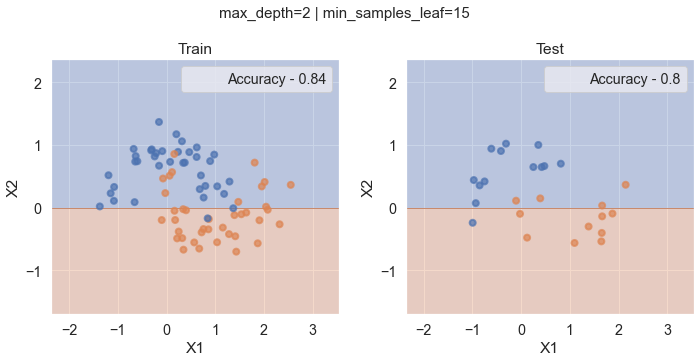

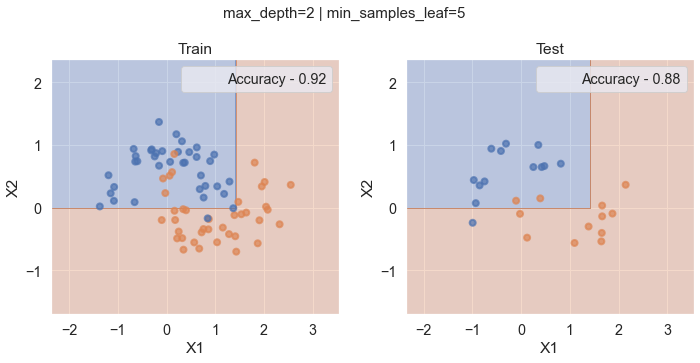

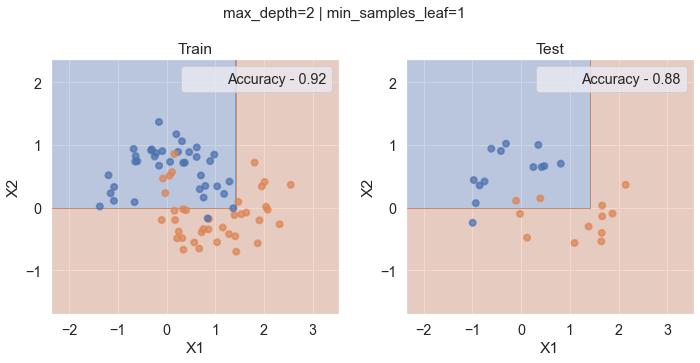

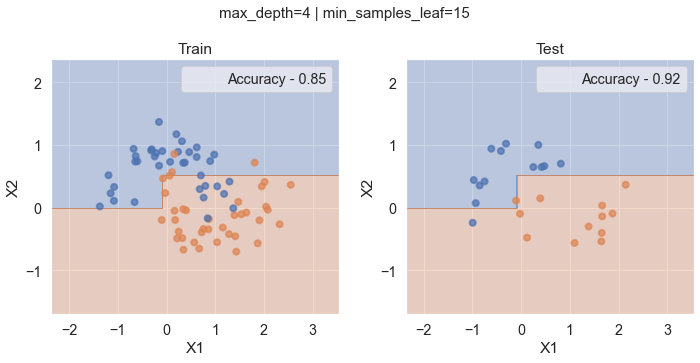

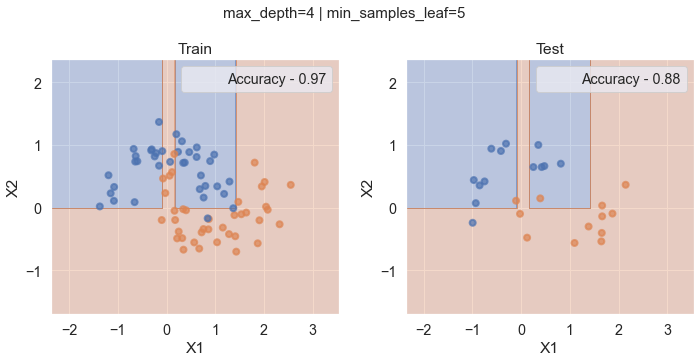

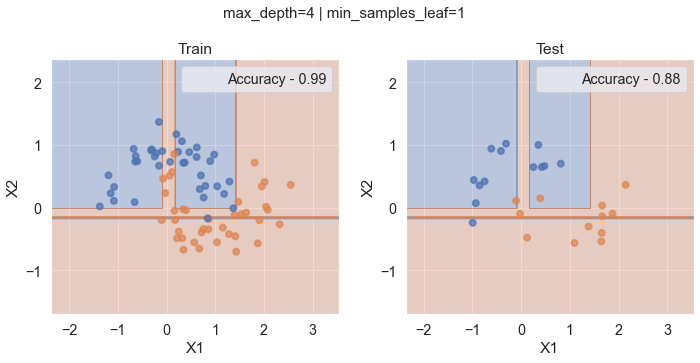

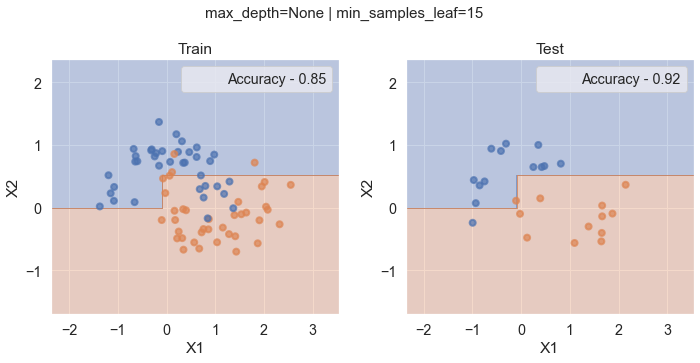

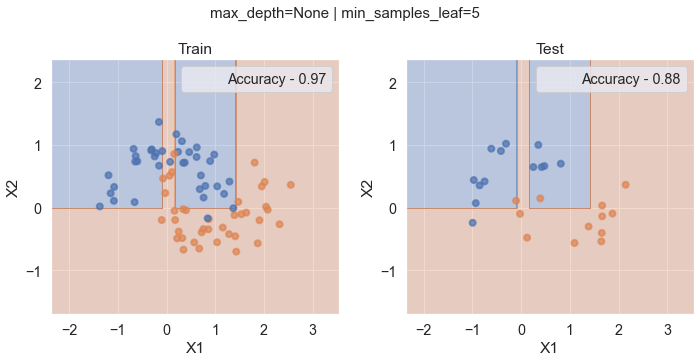

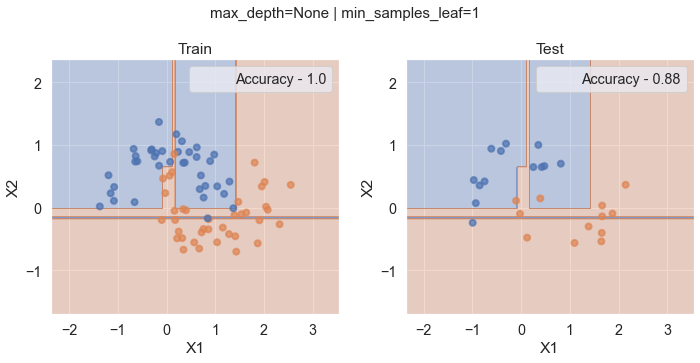

In [14]:
# Будем выбирать дерево по 2 параметрам по 3-м различным значениям
depth = [2, 4, None]
leaf = [15, 5, 1]

#Начнем с make_moons
moon_score, moon_leaf, moon_depth = find_good_tree(X_train_moon, y_train_moon, X_test_moon, y_test_moon, depth, leaf)

In [15]:
# Посмотрим на "лучший" результат

print('Best Accuracy on test - {} (min_samples_leaf={}, max_depth={})'.format(moon_score, moon_leaf, moon_depth))

Best Accuracy on test - 0.92 (min_samples_leaf=4, max_depth=15)


Скорее удача, чем реальный результат, есть еще несколько деревьев с таким результатом. (У нас очень мало данных)

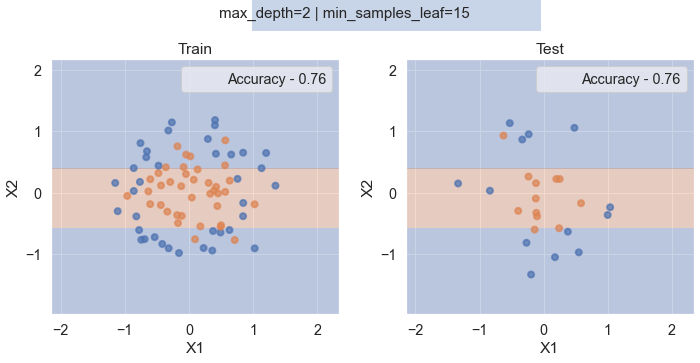

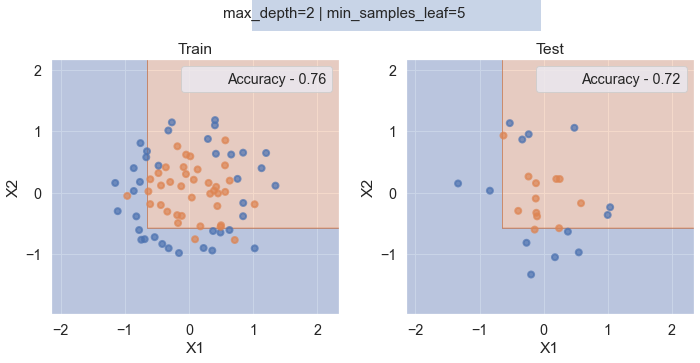

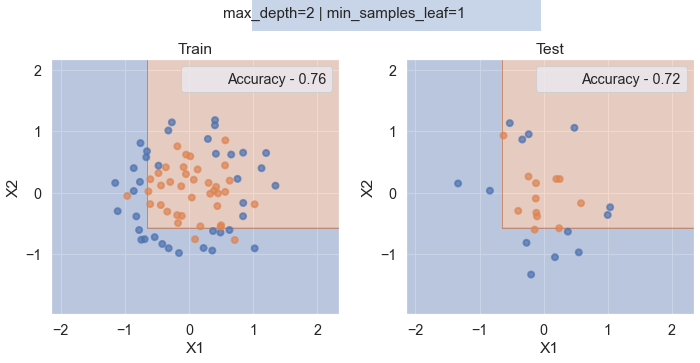

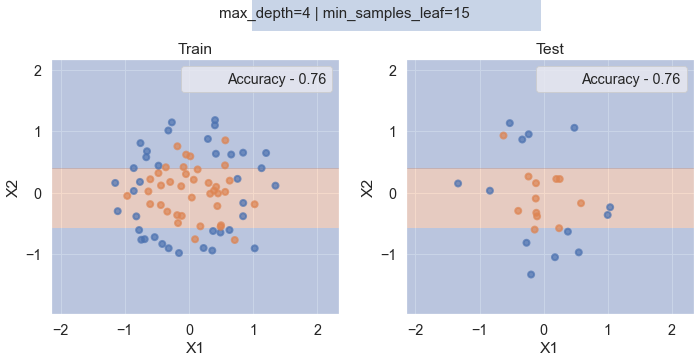

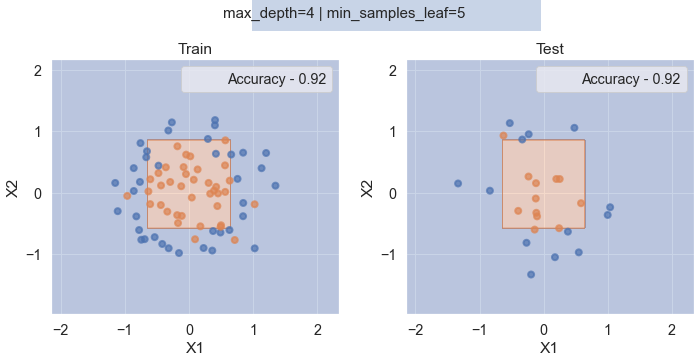

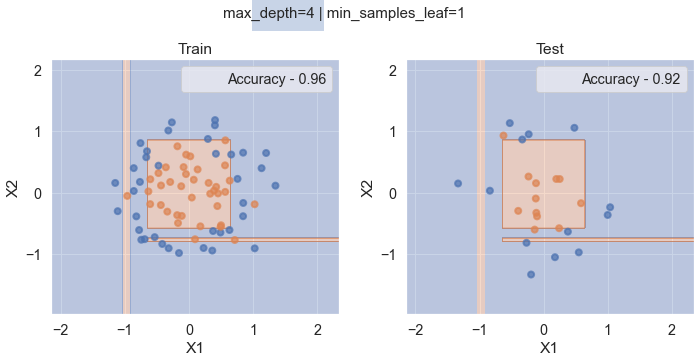

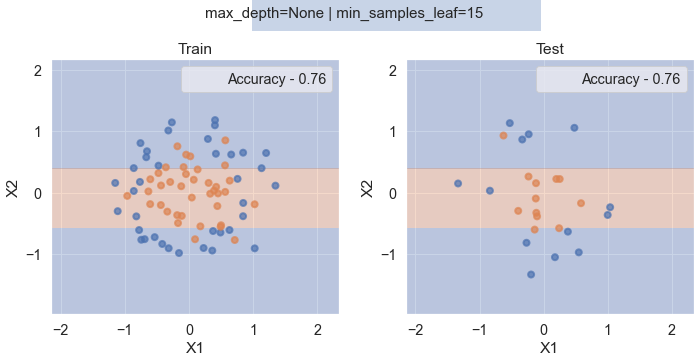

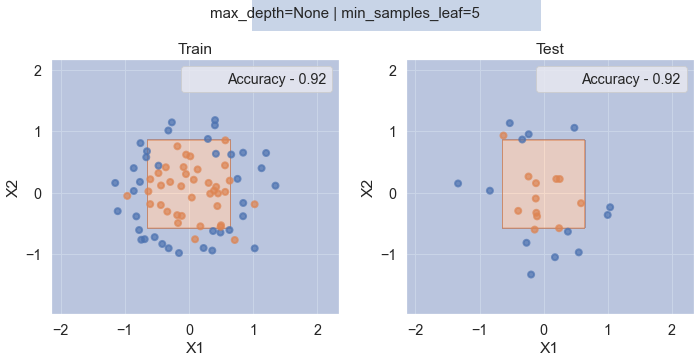

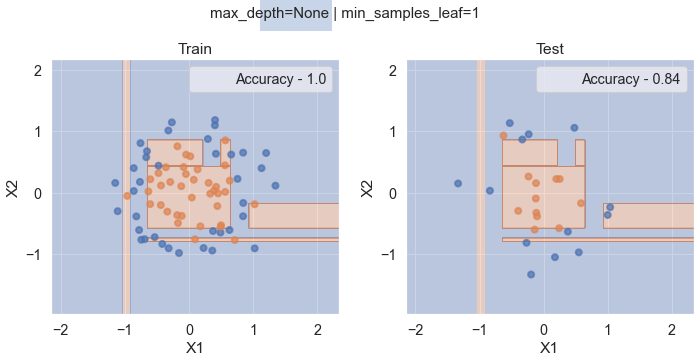

In [16]:
# Продолжим - make_circles
circles_score, circles_leaf, circles_depth = find_good_tree(X_train_circles, y_train_circles, 
                                                            X_test_circles, y_test_circles, depth, leaf)

In [17]:
# Посмотрим на "лучший" результат

print('Best Accuracy on test - {} (min_samples_leaf={}, max_depth={})'.format(circles_score, circles_leaf, circles_depth))

Best Accuracy on test - 0.92 (min_samples_leaf=4, max_depth=5)


Тут видно, что есть вполне хорошие варианты, когда модель выдает неплохой результат на тесте и при этом не переобучается.

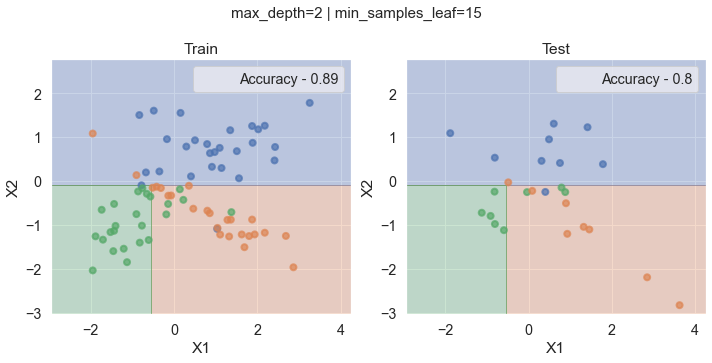

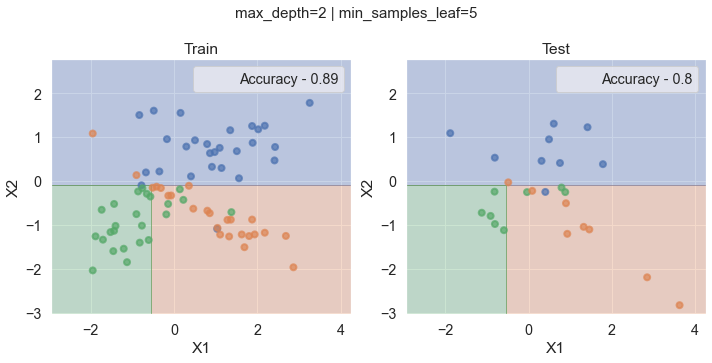

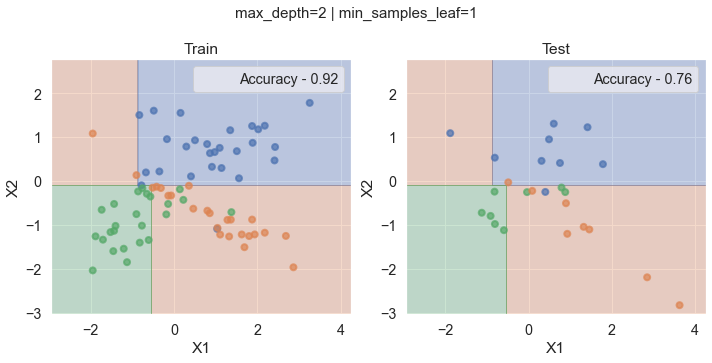

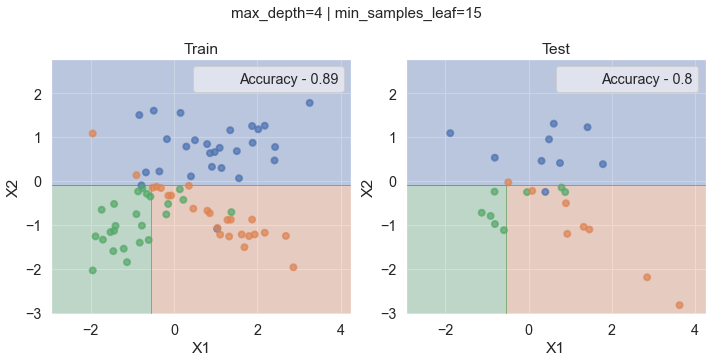

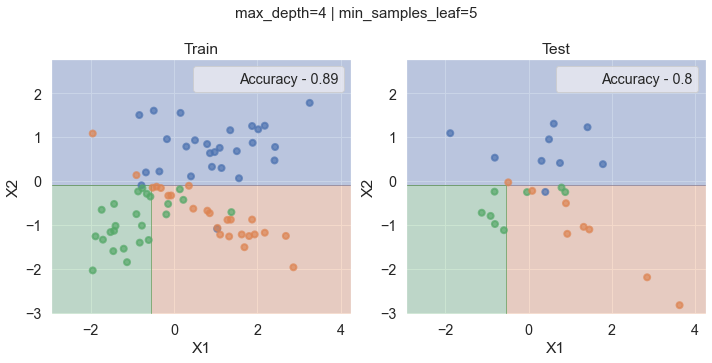

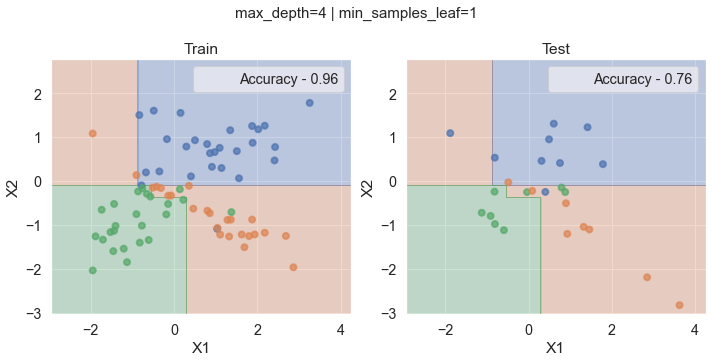

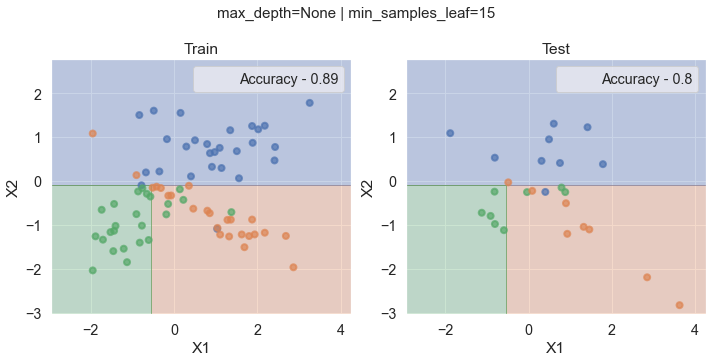

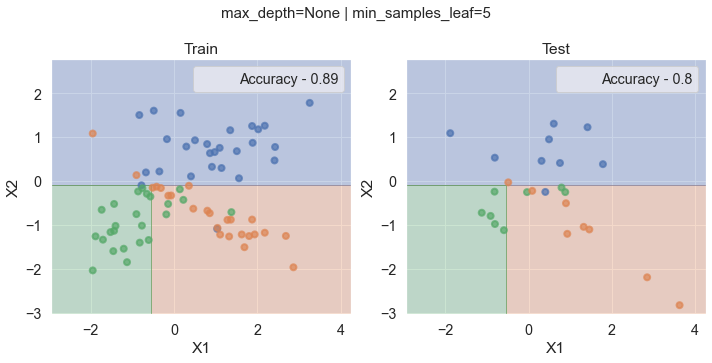

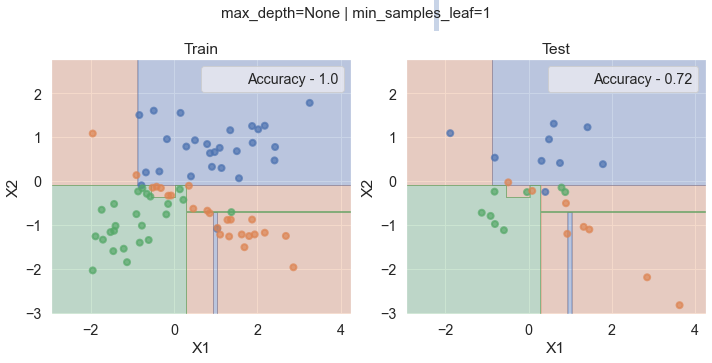

In [18]:
# Последний - classification

classification_score, classification_leaf, classification_depth = find_good_tree(X_train_clas, y_train_clas, 
                                                                        X_test_clas, y_test_clas, depth, leaf)

In [19]:
print('Best Accuracy on test - {} (min_samples_leaf={}, max_depth={})'.format(classification_score, 
                                                                              classification_leaf, classification_depth))

Best Accuracy on test - 0.8 (min_samples_leaf=2, max_depth=15)


Однозначно, хорошие разделение присутствуют, при переборе многие деревья выглядят почти одинаково, и показывают приблизительно одинаковый результат.

__Ответ:__ Поскольку количество объектов в наших данных не очень большое, то ключевым параметром, ведущим к переобучению, является `min_samples_leaf`. Но не следует исключать, что очень большое значение параметра `max_depth` тоже ведет к переобучению, поскольку при неограниченной глубине модель может подстроиться под все выбросы. Рассматривая наши результаты можно прийти к выводу, что чем больше мы даем свободы дереву, тем сильнее оно переобучается - на обучающей выборке растет доля положительных ответов, когда на тесте она низкая. При ограничении дерева до определенного порога на обучающей выборке `accuracy` приблизительно совпадает со значением на тестовой, что свидетельствует об отсутствии переобучения.

Хуже всего результат у нас получился для датасета `classification` оно и не удивительно, там три класса, а не два. В целом параметры для датасетов лучшие гиперпараметры для датасетов похожие - это не глубокое дерево с ограничением на количество объектов в листе.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Проверка - https://contest.yandex.ru/contest/21899/run-report/41928234/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [20]:
from hw5code import find_best_split

df = pd.read_csv('students.csv')

X = df.iloc[:, 0:5]
y = df.iloc[:, 5]

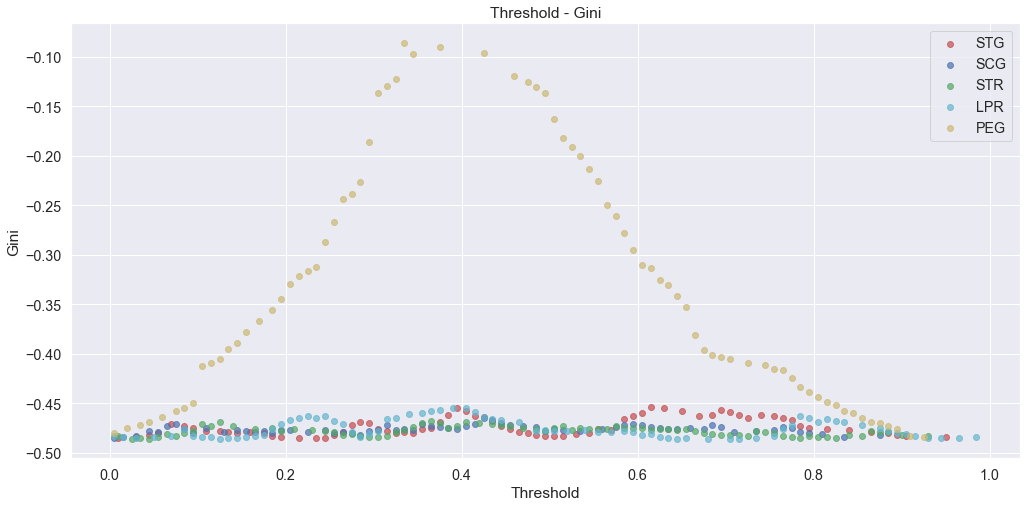

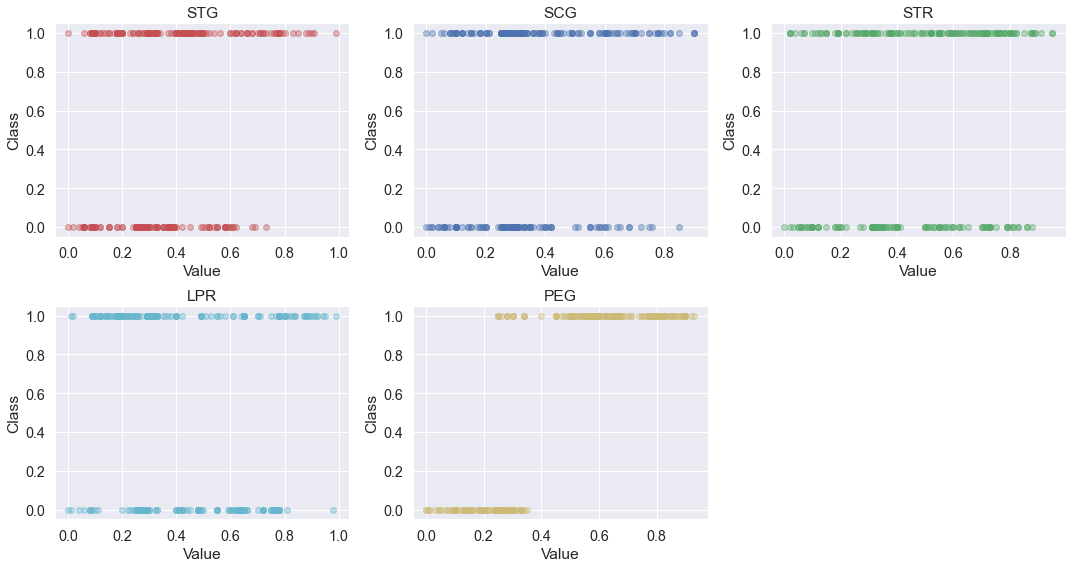

In [21]:
# Создадим переменные "Порог", "Значение критерия Джини" для каждого признака
thresholds1, gini1, _, _ = find_best_split(X.iloc[:, 0], y)
thresholds2, gini2, _, _ = find_best_split(X.iloc[:, 1], y)
thresholds3, gini3, _, _ = find_best_split(X.iloc[:, 2], y)
thresholds4, gini4, _, _ = find_best_split(X.iloc[:, 3], y)
thresholds5, gini5, _, _ = find_best_split(X.iloc[:, 4], y)

# Построим график "порог — значение критерия Джини" на одной плоскости
plt.figure(figsize=(17, 8))

plt.scatter(thresholds1, gini1, label='STG', alpha = 0.7, color = 'r')
plt.scatter(thresholds2, gini2, label='SCG', alpha = 0.7, color = 'b')
plt.scatter(thresholds3, gini3, label='STR', alpha = 0.7, color = 'g')
plt.scatter(thresholds4, gini4, label='LPR', alpha = 0.7, color = 'c')
plt.scatter(thresholds5, gini5, label='PEG', alpha = 0.7, color = 'y')

plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Threshold - Gini')
plt.legend()

plt.show()
plt.close()

# Под основным графиком отдельно выведем для каждого признака график "значение признака — класс"
plt.figure(figsize=(15, 8))

plt.subplot(231)
plt.scatter(X.iloc[:, 0], y, color = 'r', alpha = 0.4)
plt.xlabel('Value')
plt.ylabel('Class')
plt.title('STG')

plt.subplot(232)
plt.scatter(X.iloc[:, 1], y, color = 'b', alpha = 0.4)
plt.xlabel('Value')
plt.ylabel('Class')
plt.title('SCG')

plt.subplot(233)
plt.scatter(X.iloc[:, 2], y, color = 'g', alpha = 0.4)
plt.xlabel('Value')
plt.ylabel('Class')
plt.title('STR')

plt.subplot(234)
plt.scatter(X.iloc[:, 3], y, color = 'c', alpha = 0.4)
plt.xlabel('Value')
plt.ylabel('Class')
plt.title('LPR')

plt.subplot(235)
plt.scatter(X.iloc[:, 4], y, color = 'y', alpha = 0.4)
plt.xlabel('Value')
plt.ylabel('Class')
plt.title('PEG')

plt.tight_layout()
plt.show() 

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Самым лучшим параметром, по которому следует произвести деление на два поддерева в наших данных является `PEG`,
который на определенном пороге хорошо разделяет выборку на две части. На большом графике видно, что критерий Джини максимальный у признака `PEG` приблизительно на 0.4 threshold. Ведь данный признак почти линейно разделим. На промежутке значений [0, 0.4] `PEG` целевая переменная принимает значение 0 с точностью до почти наверное, когда на остальных значениях [0.4, 1] целевая переменная принимает значение 1. "Хороший" признак, по которому выборку можно разделить почти идеально, аналогичн признаку `PEG`, то есть в одной части лежат значения, которые влияют на один исход целевой переменной, а в другой части лежат значения, которые оказывают существенное влияние на другой вариант исхода. На нашем графике "порог — значение критерия Джини" такой признак чем-то напоминает график плотности нормального распределения. 

Например, мы задаем вопрос, пойдет ли ребенок сегодня в школу? И хорошим признаком для такого решения будет температура ребенка, скорее всего порог в 37 градусов, который будет делить почти идеально целевую переменную.

Самой плохой ситуацией будет являться та, когда мы упорядочим значения переменных, и она будет предсказывать ответ совершенно случайно, то 0, то 1. По такой переменной нельзя разделить выборку одним хорошим делением (если вообще возможно разделить). Критерий информативности от такого деления не уменьшится, и как следствие метрика качества не возрастет.

По всем признакам, кроме `PEG` выборку хорошо разделить не получиться, возможно если по таким признакам сделать несколько разбиений, то какой-то результат мы получим, но скорее всего к тому моменту наша модель окажется переобученной.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

Проверка - https://contest.yandex.ru/contest/21899/run-report/41928296/

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [22]:
import zipfile

zf = zipfile.ZipFile('data.zip')

mushroom = pd.read_csv(zf.open('data/agaricus-lepiota.data'))

In [23]:
from sklearn.preprocessing import LabelEncoder

# Источник вдохновения https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [24]:
# перекодируем значения
mushroom = MultiColumnLabelEncoder(columns = mushroom.columns).fit_transform(mushroom)

X_mushroom  = mushroom.iloc[:, 1:]
y_mushroom  = mushroom.iloc[:, 0]

# разделим выборку
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(
    X_mushroom.values, y_mushroom.values, test_size=0.5, random_state=101, stratify=y_mushroom)

In [25]:
from hw5code import DecisionTree 

types = ['categorical' for x in range(X_mushroom_train.shape[1])]

our_tree = DecisionTree(feature_types = types)
our_tree.fit(X_mushroom_train, y_mushroom_train)
mushroom_train_pred = our_tree.predict(X_mushroom_train)
mushroom_test_pred = our_tree.predict(X_mushroom_test)

acc_score_train_mushroom = accuracy_score(y_mushroom_train, mushroom_train_pred)
acc_score_test_mushroom = accuracy_score(y_mushroom_test, mushroom_test_pred)
print('''Accuracy score:
train - {}
test - {}'''.format(acc_score_train_mushroom, acc_score_test_mushroom))

Accuracy score:
train - 1.0
test - 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [26]:
# Загрузим все датасеты, применим ко всем LabelEncoder
tic_tac_toe = pd.read_csv(zf.open('data/tic-tac-toe.data'))
tic_tac_toe = MultiColumnLabelEncoder(columns = tic_tac_toe.columns).fit_transform(tic_tac_toe)

cars = pd.read_csv(zf.open('data/car.data'))
# Переведем ответы в True и False
cars.unacc = ((cars.unacc == 'good') | (cars.unacc == 'vgood'))
cars = MultiColumnLabelEncoder(columns = cars.columns).fit_transform(cars)

nursery = pd.read_csv(zf.open('data/nursery.data'))
# Переведем ответы в True и False
nursery.recommend = ((nursery.recommend == 'very_recom')|(nursery.recommend == 'priority')\
                     |(nursery.recommend == 'spec_prior'))
nursery = MultiColumnLabelEncoder(columns = nursery.columns).fit_transform(nursery)

# Создадаим дерево со стандартными параметрами
tree_sklearn = DecisionTreeClassifier(random_state=55)

Отделим целевую переменную от признаков

In [27]:
X_mushroom = mushroom.iloc[:, 1:]
y_mushroom = mushroom.iloc[:, 0]

X_tic = tic_tac_toe.drop(columns = 'positive')
y_tic = tic_tac_toe.positive

X_cars = cars.iloc[:, :-1]
y_cars = cars.iloc[:, -1]

X_nursery = nursery.iloc[:, :-1]
y_nursery = nursery.iloc[:, -1]

In [28]:
from sklearn.model_selection import StratifiedKFold

# Данные необходимо сбалансировать иначе у нас получится, мягко сказать плохой результат

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=500)

In [29]:
# Нам надо заполнить 4 таблицы, давайте создадим функцию 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def complete_table(X, y):
    # Создадим таблицу для результатов
    table = pd.DataFrame(columns = ['DecisionTree(real)', 'DecisionTree(categorical)', 
                                    'DecisionTree(OneHotEncoder)', 'DecisionTreeClassifier(sklearn)'])
    
    # DecisionTree(real)
    types = ['real' for x in range(X.shape[1])]
    real_tree = DecisionTree(feature_types = types)
    real_scores = cross_val_score(real_tree, X=X.values, y=y.values, cv=cv.split(X, y), n_jobs=-1, 
                                  scoring=make_scorer(accuracy_score))
    table.iloc[:, 0] = real_scores
    
    # DecisionTree(categorical)
    types = ['categorical' for x in range(X.shape[1])]
    categorical_tree = DecisionTree(feature_types = types)
    categorical_scores = cross_val_score(categorical_tree, X=X.values, y=y.values, cv=cv.split(X, y), n_jobs=-1, 
                                         scoring=make_scorer(accuracy_score))
    table.iloc[:, 1] = categorical_scores
    
    # DecisionTree(OneHotEncoder)
    # Закодируем признаки 
    column_transformer = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), X.columns)])

    try:
        X_enc = column_transformer.fit_transform(X).toarray()
    except AttributeError:
        X_enc = column_transformer.fit_transform(X)
    X_enc = pd.DataFrame(X_enc)
    X_enc.index = X.index
    
    # Заполним таблицу
    types = ['real' for x in range(X_enc.shape[1])]
    OHE_tree = DecisionTree(feature_types = types)
    OHE_scores = cross_val_score(OHE_tree, X=X_enc.values, y=y.values, cv=cv.split(X, y), n_jobs=-1, 
                                         scoring=make_scorer(accuracy_score))
    table.iloc[:, 2] = OHE_scores
    
    # DecisionTreeClassifier(sklearn)
    sklearn_scores = cross_val_score(tree_sklearn, X=X, y=y, cv=cv.split(X, y), n_jobs=-1, 
                                     scoring=make_scorer(accuracy_score))
    table.iloc[:, 3] = sklearn_scores
    
    # Найдем лучшее дерево(алгоритм) 
    trees = ['DecisionTree(real)', 'DecisionTree(categorical)', 
             'DecisionTree(OneHotEncoder)', 'DecisionTreeClassifier(sklearn)']
    scores = np.array([np.mean(real_scores), np.mean(categorical_scores),
                      np.mean(OHE_scores), np.mean(sklearn_scores)])
    index = np.argsort(scores)
    trees_sorted = []
    for i in index:
        trees_sorted.append(trees[i])
    trees = trees_sorted[::-1]
    scores = scores[index][::-1]
    
    return table, trees, scores

In [30]:
# mushroom
mushroom_results, mushroom_trees, mushroom_scores = complete_table(X_mushroom, y_mushroom)
if len(set(mushroom_scores)) <= 1:
    print('There are no best tree(algorithm). For all trees mean score - 1')
else:
    for i in range(4):
        print('Mean score for {} is {}, this tree comes {}'.format(mushroom_trees[i], mushroom_scores[i], i+1))
mushroom_results

There are no best tree(algorithm). For all trees mean score - 1


,DecisionTree(real),DecisionTree(categorical),DecisionTree(OneHotEncoder),DecisionTreeClassifier(sklearn)
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0


In [31]:
# tic_tac_toe
tic_tac_toe_results, tic_tac_toe_trees, tic_tac_toe_scores = complete_table(X_tic, y_tic)
if len(set(tic_tac_toe_scores)) <= 1:
    print('There are no best tree(algorithm). For all trees mean score - 1')
else:
    for i in range(4):
        print('Mean score for {} is {}, this tree comes {}'.format(tic_tac_toe_trees[i], tic_tac_toe_scores[i], i+1))
tic_tac_toe_results

Mean score for DecisionTree(categorical) is 0.9477960526315791, this tree comes 1
Mean score for DecisionTree(OneHotEncoder) is 0.9457017543859649, this tree comes 2
Mean score for DecisionTree(real) is 0.8766666666666666, this tree comes 3
Mean score for DecisionTreeClassifier(sklearn) is 0.8692763157894736, this tree comes 4


,DecisionTree(real),DecisionTree(categorical),DecisionTree(OneHotEncoder),DecisionTreeClassifier(sklearn)
0,0.781250,0.937500,0.937500,0.812500
1,0.937500,0.927083,0.927083,0.947917
2,0.895833,0.937500,0.927083,0.864583
3,0.822917,0.958333,0.958333,0.833333
4,0.927083,0.968750,0.968750,0.916667
5,0.885417,0.916667,0.916667,0.875000
6,0.916667,0.947917,0.947917,0.937500
7,0.873684,1.000000,1.000000,0.852632
8,0.863158,0.947368,0.936842,0.831579
9,0.863158,0.936842,0.936842,0.821053


In [32]:
# cars
cars_results, cars_trees, cars_scores = complete_table(X_cars, y_cars)
if len(set(cars_scores)) <= 1:
    print('There are no best tree(algorithm). For all trees mean score - 1')
else:
    for i in range(4):
        print('Mean score for {} is {}, this tree comes {}'.format(cars_trees[i], cars_scores[i], i+1))
cars_results

Mean score for DecisionTree(real) is 0.9953690012098401, this tree comes 1
Mean score for DecisionTreeClassifier(sklearn) is 0.994790966527759, this tree comes 2
Mean score for DecisionTree(categorical) is 0.994212931845678, this tree comes 3
Mean score for DecisionTree(OneHotEncoder) is 0.9878511896760317, this tree comes 4


,DecisionTree(real),DecisionTree(categorical),DecisionTree(OneHotEncoder),DecisionTreeClassifier(sklearn)
0,1.000000,1.000000,0.994220,1.000000
1,1.000000,1.000000,0.994220,0.994220
2,1.000000,1.000000,1.000000,1.000000
3,0.994220,0.994220,0.976879,0.994220
4,0.988439,0.988439,0.971098,0.988439
5,0.994220,0.982659,0.976879,0.994220
6,0.988439,0.988439,0.982659,0.988439
7,0.994186,0.994186,0.988372,0.994186
8,1.000000,1.000000,1.000000,1.000000
9,0.994186,0.994186,0.994186,0.994186


In [33]:
# nursery
nursery_results, nursery_trees, nursery_scores = complete_table(X_nursery, y_nursery)
if len(set(nursery_scores)) <= 1:
    print('There are no best tree(algorithm). For all trees mean score - 1')
else:
    for i in range(4):
        print('Mean score for {} is {}, this tree comes {}'.format(nursery_trees[i], nursery_scores[i], i+1))
nursery_results

Mean score for DecisionTree(OneHotEncoder) is 0.9997685185185186, this tree comes 1
Mean score for DecisionTree(categorical) is 0.9997685185185186, this tree comes 2
Mean score for DecisionTreeClassifier(sklearn) is 0.9996912984412984, this tree comes 3
Mean score for DecisionTree(real) is 0.9996912984412984, this tree comes 4


,DecisionTree(real),DecisionTree(categorical),DecisionTree(OneHotEncoder),DecisionTreeClassifier(sklearn)
0,1.000000,1.000000,1.000000,1.000000
1,0.999228,0.999228,0.999228,0.999228
2,0.999228,0.999228,0.999228,0.999228
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,0.999228,0.999228,0.999228,0.999228
9,0.999228,1.000000,1.000000,0.999228


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Давайте начнем по порядку, на первом датасете `mushroom` все алгоритмы показали себя одинаково и идеально смогли разделить выборку на положительный и отрицательный(нулевой) класс. Это значит, что в датасете присутствуют признаки, которые позволяют однозначно разделять выборку. Когда мы изучали датасет `students` там существовал признак, для которого значение критерия Джини на некотором уровне порога позволяло хорошо разбивать выборку на положительный и отрицательный класс. Похожая ситуация должна наблюдаться и для данного датасета. 

Давайте попробуем для каждого датасета построить график аналогичный тому, что мы строили для `students`. На графике количество точек будет символизировать - количество возможных разбиений дерева на поддеревья, а по количеству различных цветов можно судить сколько существует различных признаков, на основании которых можно произвести разбиение.

In [34]:
# Функция построения графика
def make_plot(X, y, plot_name):
    plt.figure(figsize=(10, 5))
    for i in range(X.shape[1]):
        thresholds, gini, _, _ = find_best_split(X.iloc[:, i], y)
        plt.scatter(thresholds, gini, alpha = 0.7, s=100)
    plt.xlabel('Threshold')
    plt.ylabel('Gini')
    plt.title(plot_name)
    plt.show()

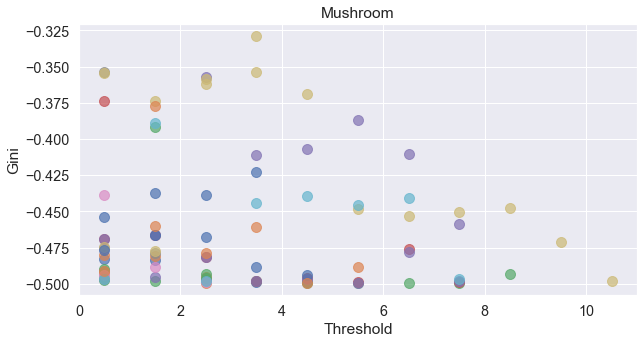

In [35]:
make_plot(X_mushroom, y_mushroom, 'Mushroom')

По графику видно, что в данном датасете присутствует большое количество признаков, на основании которых можно осуществить разбиение. Данный факт позволяет нашим алгоритмам (всем) показать идеальный результат классификации. 

Продолжим, теперь датасет `tic_tac_toe`, самыми лучшими алгоритмами оказались DecisionTree(categorical) и DecisionTree(OneHotEncoder), при этом небольшую разницу можно списать на погрешность. Также похожий результат показали DecisionTree(real) и DecisionTreeClassifier(sklearn). Таким образом, предпосылка о там, что признаки в этом датасете имеют линейную зависимость (все признаки - вещественные) неверна (возможно для некоторых признаков эта предпосылка верна, иначе наш алгоритм выдавал бы совсем плохие результаты на таких алгоритмах). Соответственно в таком датасете правильным будет принять все признаки за категориальные и уже на их основе осуществлять разбиение.

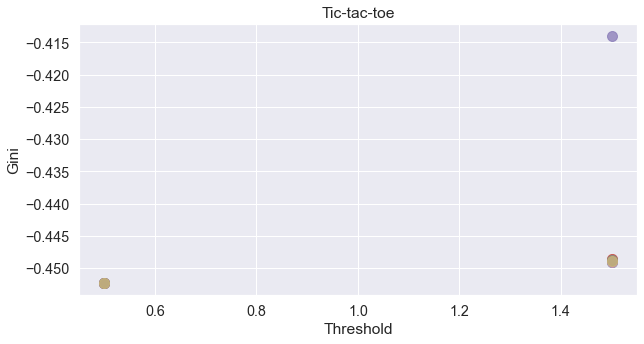

In [36]:
make_plot(X_tic, y_tic, 'Tic-tac-toe')

В отличии от `mushroom` тут нет много признаков, по которым существует хорошее разбиение. На графике мы видим всего несколько точек, а это значит, что существует всего несколько признаков и лишь на нескольких порогах - для данного датасета мало признаков, приводящих к хорошему разделению на поддеревья. Собственно, данных факт и способствовал тому, что вещественные признаки показали хуже результат и для данного датасета результаты хуже всего (если сравнивать с остальными). Таким образом, датасет `tic_tac_toe` является наиболее трудным для корректной классификации. Мало того, что в данном датасете мало признаков, которые подходят для разбиения, так еще и значение критерия Джини от таких разбиений достаточно низкое. 

Для датасета `cars` все алгоритмы показали приблизительно одинаковый результат, однако все-таки алгоритмы, которые считают, что все признаки вещественные показали результаты лучше. Тогда для этого датасета предпосылка о том, что существует линейная зависимость в данных верна, в последовательности из чисел действительно есть взаимосвязь. Поэтому категориальные версии алгоритмов показывают результат хуже. А для DecisionTree(OneHotEncoder) оказался значительно хуже, чем для остальных алгоритмов, вероятно данное дерево переобучилось.

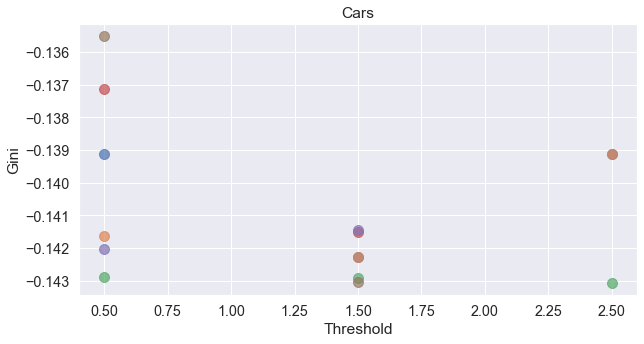

In [37]:
make_plot(X_cars, y_cars, 'Cars')

На графике мы видим, что существует достаточное количество признаков, на основании которых можно наше дерево разбить на поддеревья, при этом для таких признаков значение критерия Джини имеет достаточно большое значение для того, чтобы в итоге наши алгоритмы смогли хорошо классифицировать объекты.

Для датасета `nursery` результаты похожи на результаты `mushroom`, однако что-то нашим алгоритмам мешает осуществлять идеальную классификацию. Вероятно, это и есть тот самый случайный фактор, о котором говорилось в задании. Все алгоритмы показали почти идентичный результат, разницу спишем на погрешность. Давай те же быстрее строить график, может он что-то нам покажет.

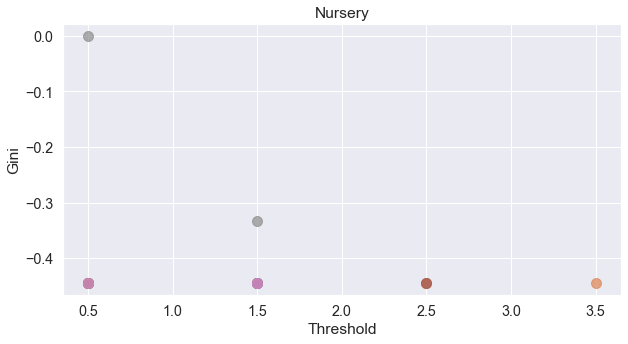

In [38]:
make_plot(X_nursery, y_nursery, 'Nursery')

По графику мы видим, что признаков хоть и немного, однако, существует один признак на одном из порогов для которого, значение критерия Джини равно нулю, а это означает, что если мы осуществим разделение по данному признаку на данном пороге, то мы сможем идеально на основании одного деления на поддеревья классифицировать объекты. Скорее всего данный признак является утечкой целевой переменной, поскольку точно на пороге 0.5 можно разделить выборку по такому признаку на положительный и отрицательный класс. Погрешность может быть связана с тем, что существует объект, который либо является выбросом (его следовало бы удалить), либо значение признака, по которому можно разделить выборку для данного объекта принимает значение 0.5, что не позволяет отнести с достоверностью данный объект к конкретному классу. Как говориться "ни рыба, ни мясо", вероятно, краб или лобстер. 

**Общие выводы**: для каждого набора данных лучшим будет свой алгоритм, прежде всего надо изучать предметную область из которой приходят данные, немного разбираясь в отрасли можно самостоятельно с хорошей долей вероятности определить какая зависимость между данными возможна (если предметная область не квантовая физика:) ), а не перебирать алгоритмы и смотреть - данный признак является категориальным или вещественным.

В данных могут существовать утечки целевой переменный, что скорее является ошибкой аналитика, который собирал данные. А с нашей стороны, конечно же, выгодно максимально быстро обнаружить эту утечку. 

И, несомненно, данные лучше чистить от выбросов, скорее мы для "нормальных" объектов хотим предсказывать целевую переменную, нежели среднюю температуру по больнице для всех данных (т.е. подстраиваться под выбросы). Возможна и обратная ситуация, когда мы хотим оставить выбросы, но она больше характерна для соревнований, когда мы гонимся за каждым значением пятого знака после запятой показателя функции ошибки или метрики качества.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Источники знаний:
- https://pastebin.com/pssBMQra
- https://pastebin.com/wYNNdA8A
- https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn